Сегодня мы попробуем поработать с библиотекой scikit-learn. Эта библиотека включает в себя множество алгоритмов, несколько тестовых наборов данных, функции для подсчета метрик и подбора параметров.

---

Scikit-learn появился как проект David Cournapeau на Google Summer of Code. Позднее к проекту присоединились другие разработчики, и первый релиз библиотеки состоялся 1 февраля 2010 года. Она быстро стало популярной за большое количество алгоритмов и простоту использования. sklearn полезна для экспериментов,  написания быстрых прототипов, участия в соревнованиях по анализу данных и во множестве других приложения. В тоже время, для промышленных проектов она может не подходить ввиду не оптимизированного кода и выбранного языка.



Возьмем стандартный датасет. Датасет содержит информацию о квартирах в Бостоне и их параметрах.

Посмотрим на поля датасета.

In [1]:
import pandas as pd
import numpy as np
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [2]:
raw_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


In [30]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [3]:
y = target
x = data

In [4]:
print("Размер матрицы объектов: ", x.shape)
print("Рaзмер вектора y: ", y.shape)

Размер матрицы объектов:  (506, 13)
Рaзмер вектора y:  (506,)


Посмотрим на наши данные. Давайте построим  график того, как зависит цена от криминогенной обстановки. Для этого воспользуемся библиотекой matplotlib.

In [5]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'Price')

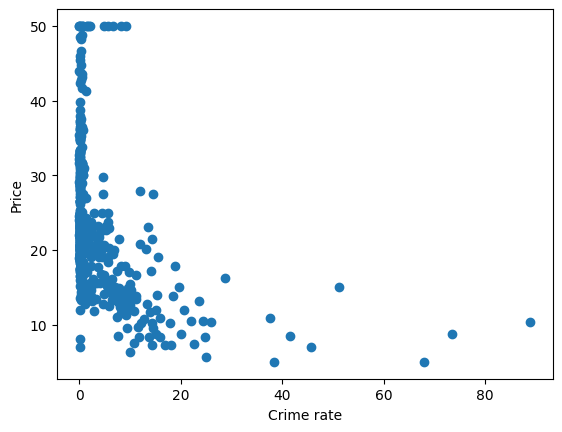

In [6]:
plt.scatter(x[:,0], y)
plt.xlabel('Crime rate')
plt.ylabel('Price')

Как мы видим, все закономерно, дорогие квартиры находятся в районах с низким уровнем преступности.

In [7]:
from sklearn.model_selection import train_test_split

С помощью функции `train_test_split` разобьем выборку на `train` и `test`.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [9]:
from sklearn.neighbors import KNeighborsRegressor


В sklearn, разные методы лежат в разных модулях. Например в linear_model находятся линейные модели, в neighbors - методы основанные на ближайших соседях.

Импортируем алгоритм knn из sklearn. Работа с алгоритмами машинного обучения в библиотеке состоит из трех этапов.



1.   Создание объекта, который будет реализовывать алгоритм.
2.   Вызов `fit`: обучение модели на тренировочной подвыборке
3.   Вызов `predict`: получение предсказаний на тестовой выборке



In [10]:
knn = KNeighborsRegressor(n_neighbors=5, weights='uniform', p=2)

In [11]:
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [12]:
predictions = knn.predict(X_test)
print(predictions)

[29.1  14.5  27.96 20.64 20.5  16.78 23.28 20.52 19.16 11.64 20.86 33.26
 30.04 20.14 23.08 34.8  21.62 21.6  36.24 20.   20.12 22.32 28.44 17.48
 42.92 25.28 25.28 19.64 24.74 28.02 22.62 18.04 19.94 21.94 22.44 22.42
 12.2  28.04 29.1  27.42 21.64 38.5  41.58 27.68 23.08 16.74 27.96 31.62
 12.56 20.24 29.08 36.16 35.58 14.98 23.76 27.76 19.64 13.42 13.18 27.16
 22.7  35.72 27.32 23.24 29.62 25.16 22.98 11.26 15.76 19.4  15.74  8.88
 15.16 14.   30.04 38.48 23.8  23.8  25.72 21.6  25.9  11.68 24.5  18.52
 25.72 12.18 20.56 21.92 13.66 25.54 30.04 14.18 18.74 28.44 28.72 22.12
 22.18 30.34 12.16 29.18 34.42 29.94]


Отлично! Мы получили предсказания. Посчитаем метрику, соответствующая функция есть в scikit-learn! Будет считать средне квадратичную ошибку, так как мы решаем задачу регрессии.

In [13]:
y_train

array([26.5, 21. ,  5. , 16.1, 30.1, 11. ,  9.6, 23.9, 22.4, 12.1, 10.8,
       14.5, 29.8, 20.3, 20.6, 20.4, 15.2, 34.6, 13.1, 22.7,  8.7, 21.2,
       23.3, 22.2, 50. , 13.1, 23.8,  8.8, 19.6, 28.4, 14.3, 29.9, 18.5,
       23.1, 10.4, 30.1, 23.7, 16.2, 21.2, 14.4,  5. , 32.9, 46.7, 17.8,
       19.4, 15.1, 19.6, 25.1, 20.6, 21.4, 18.7, 14.3, 43.1, 20. , 19.9,
       26.2, 18.2,  6.3,  8.1, 15.6, 13.6,  7. , 21.8, 18.3, 22. , 30.3,
       32.7, 23.7, 14.9, 19.3, 15.6, 20. , 25. , 23.6, 24.3, 26.6, 33. ,
       21.2, 19.2, 18.3, 20.1, 50. , 22.3, 12.7, 12.3, 24.3, 13.8, 24.1,
       32.2, 31. , 31.6, 30.7, 30.1, 20.3, 22.5, 36.5, 20.3, 13.8, 23.1,
       17.2, 13.8, 11.9, 48.8, 16.5, 10.9, 24.5, 29.1, 19.2, 22.2, 24.8,
       23.9, 13.4, 13.5, 17.8, 36.4, 33.1, 17.1, 27.1, 11.5, 50. , 17.5,
       22.8,  8.3, 50. , 50. , 11.8, 19.6, 41.3, 26.6, 27.1, 14.9, 20.6,
       32.4, 21.6, 16.8, 21.7, 14.1, 20.5, 10.4, 21.7, 27.5, 19.8, 17.1,
       22.7, 21.5, 16.1, 20.7, 22.6, 18.9, 23.3, 44

In [14]:
from sklearn.metrics import mean_squared_error

In [15]:
mean_squared_error(y_test, predictions)

33.27236862745098

Давайте попробуем сделать лучше! У нашего алгоритма есть множество гиперпараметров: количество соседей, параметры метрики и веса. Запустим поиск по сетке гиперараметров, алгоритм переберет все возможные комбинации, посчитает метрику для каждого набора и выдаст лучший набор.

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
grid_searcher = GridSearchCV(KNeighborsRegressor(),
                             param_grid={'n_neighbors': [1,4,5, 6,7, 10, 20],
                                         'weights': ['uniform', 'distance'],
                                         'p': [1, 2, 3]},
                             cv=20)

Параметр cv=5 говорит, что во время поиска оптимальных парамертов будет использоваться кросс-валидация с 5 фолдами. Давайте вспомним, что это такое.
В нашем случае, выборка будет разделена на 5 частей и на каждой из 5 итераций, часть данных будет становиться тестовой выборкой, а другая часть - обучающей. Посчитав метрики на каждой итерации, мы сможем усреднить их в конце и получить достаточно точную оценку качества нашего алгоритма.

In [18]:
grid_searcher.fit(X_train, y_train);

In [19]:
grid_searcher.best_params_

{'n_neighbors': 6, 'p': 1, 'weights': 'distance'}

Попросим предсказание лучшей модели.

In [26]:
best_predictions = grid_searcher.predict(X_test)
best_predictions

array([31.39457463, 14.46116897, 28.10182967, 20.76485316, 19.59988917,
       16.9934705 , 23.89952716, 19.16450897, 21.12006785, 11.86035151,
       20.48846262, 36.15262714, 31.29502654, 20.03159563, 22.38098244,
       39.07584972, 15.74159893, 22.85897947, 39.5019635 , 23.94214053,
       20.51793264, 21.25216909, 27.99111354, 19.42867127, 35.9917582 ,
       26.53550258, 24.40087947, 20.28138615, 19.71075721, 27.47501519,
       24.92289915, 18.10282571, 19.36849033, 21.51075186, 21.79413942,
       22.10715752, 11.88907636, 27.34856879, 28.91135475, 26.30691145,
       22.26682827, 43.15482352, 46.93553874, 27.90068329, 21.17086397,
       15.39220647, 28.93101225, 31.38539779, 12.66061462, 20.17745724,
       31.08258848, 36.20693512, 32.92377793, 14.435289  , 24.97955596,
       34.38079151, 19.77835222, 13.19569174, 12.94799427, 23.1820144 ,
       24.93183558, 37.08978097, 27.84811849, 23.36244172, 27.32005644,
       17.96028407, 21.4422667 , 10.94041029, 14.83286266, 18.89

И  посчитаем метрику

In [21]:
mean_squared_error(y_test, best_predictions)

23.305046647336965

Давайте посмотрим на качество алгоритма в зависимости от количества соседей. Качество будем оценивать на обучающей выборке


In [22]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [23]:
metrics = []
for n in range(1, 40, 2):
  knn = KNeighborsRegressor(n_neighbors=n)
  scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
  metrics.append(np.mean(scores))

In [24]:
from matplotlib import pyplot as plt

Text(0.5, 0, 'Number of neightbors')

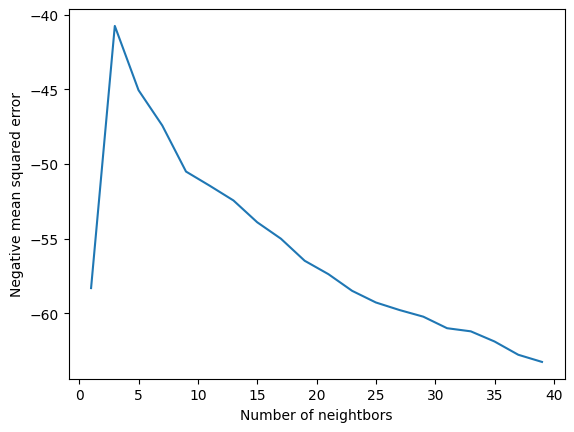

In [25]:
plt.plot(range(1, 40, 2), metrics)
plt.ylabel('Negative mean squared error')
plt.xlabel('Number of neightbors')

Вопросы, ответы на которые следует привести в конце ноутбука:
1. Какую задачу вы решали и на каких данных вы ее решали?
**Решили задачу регрессии на данных о стоимость жилья в зависимости от уровня приступности в районе**
2. Каким методом вы решали эту задачу?
**Методом k-ближайших соседей**
3. Какую библиотеку и какие алгоритмы вы использовали?
**sklearn из неё взяли пакет KNeighborsRegressor, также для улучшения обучения мы использовали кросс валдиацию из той же библиотеки, пакет для кросс валидации использовался - cross_val_score**
4. Каким образом вы выбрали значения гиперпараметров?
**Мы перебрали множества значений для числа соседей, весов соседей и того как будем определять расстояние между соседями**
5. Какие значения гиперпараметров вы использовали для оптимальной модели и что они означают?
**Колчество ближайших соседей =5, этот параметр отвечает за то, по скольки самым близким соседям мы будем оценивать нашу точку
weights= distance - означает что чем больше расстояние от точки до соседа, тем меньшее влияние он оказывает на прогноз,
p=1 означает что мы выбрали Манхэтоновское расстояние между точками, от него зависит как мы будем определять дистанцию между точками**
6. Поиграйте размером признакового пространства (добавьте еще признаков или удалите, если изначально их было много). Как это повлияло на метрику качества и выбор оптимальных значений гиперпараметров?
**Оптимальное значение параметров соседей по прежнему осталось = 5, при кросс валидации = 5,
но если поменять значение cv=7, то оптимальным параметром соседей становится 6 соседей
если cv=20, то оптимальное число соседей становится  4**

Задание: на других данных посчитать метрику и тд

In [61]:
d_f=pd.read_csv("math_students.csv")

In [62]:
d_f

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [32]:
len(d_f.columns)

33

In [64]:
categorical_columns = d_f.select_dtypes(include=['object']).columns
numeric_columns = d_f.select_dtypes(include=['int64', 'float64']).columns
categorical_columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [65]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

In [66]:
for col in categorical_columns:
    d_f[col] = le.fit_transform(d_f[col])


In [67]:
d_f

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,3,3,...,5,5,4,4,5,4,11,9,9,9
391,1,1,17,1,1,1,3,1,3,3,...,2,4,5,3,4,2,3,14,16,16
392,1,1,21,0,0,1,1,1,2,2,...,5,5,3,3,3,3,3,10,8,7
393,1,1,18,0,1,1,3,2,3,2,...,4,4,1,3,4,5,0,11,12,10


In [68]:
X=d_f.drop("G3",axis=1)

In [69]:
X

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,0,18,1,0,0,4,4,0,4,...,0,4,3,4,1,1,3,6,5,6
1,0,0,17,1,0,1,1,1,0,2,...,0,5,3,3,1,1,3,4,5,5
2,0,0,15,1,1,1,1,1,0,2,...,0,4,3,2,2,3,3,10,7,8
3,0,0,15,1,0,1,4,2,1,3,...,1,3,2,2,1,1,5,2,15,14
4,0,0,16,1,0,1,3,3,2,2,...,0,4,3,2,1,2,5,4,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,3,3,...,0,5,5,4,4,5,4,11,9,9
391,1,1,17,1,1,1,3,1,3,3,...,0,2,4,5,3,4,2,3,14,16
392,1,1,21,0,0,1,1,1,2,2,...,0,5,5,3,3,3,3,3,10,8
393,1,1,18,0,1,1,3,2,3,2,...,0,4,4,1,3,4,5,0,11,12


In [70]:
y=d_f["G3"]

In [71]:
y

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [73]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV


In [88]:
grid_searcher = GridSearchCV(KNeighborsRegressor(),
                             param_grid={'n_neighbors': [1,4,5, 6,7,8,9 ,10, 20],
                                         'weights': ['uniform', 'distance'],
                                         'p': [1, 2, 3]},
                             cv=5)


In [90]:
grid_searcher.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 4, 5, 6, 7, 8, 9, 10, 20],
                         'p': [1, 2, 3], 'weights': ['uniform', 'distance']})

In [91]:
predict=grid_searcher.predict(X_test)

In [86]:
mean_squared_error(predict,y_test)

3.8232917241768916

In [92]:
grid_searcher.best_params_

{'n_neighbors': 7, 'p': 2, 'weights': 'distance'}

In [96]:
1-mean_squared_error(predict,y_test)/np.mean(d_f["G3"])

0.6934250616229004

Text(0.5, 0, 'Number of neightbors')

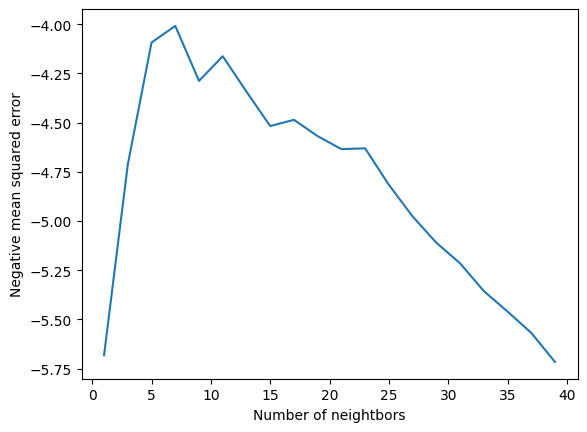

In [80]:
metrics = []
for n in range(1, 40, 2):
    knn = KNeighborsRegressor(n_neighbors=n)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    metrics.append(np.mean(scores))
from matplotlib import pyplot as plt

plt.plot(range(1, 40, 2), metrics)
plt.ylabel('Negative mean squared error')
plt.xlabel('Number of neightbors')